# PROJECT3: Real-time Data Processing with Apache Kafka and Apache Spark

In [2]:
from kafka import KafkaProducer
import time
import json
import random

producer = KafkaProducer(bootstrap_servers='localhost:9092', value_serializer=lambda x: json.dumps(x).encode('utf-8'))

def generate_data():
    return {
        'id': random.randint(1, 1000),
        'value': random.random(),
        'timestamp': time.strftime('%Y-%m-%d %H:%M:%S')
    }

while True:
    data = generate_data()
    producer.send('real-time-data', value=data)
    print(f"Sent: {data}")
    time.sleep(1)

Sent: {'id': 991, 'value': 0.060667907759991646, 'timestamp': '2024-09-12 15:03:41'}
Sent: {'id': 740, 'value': 0.6376311429327169, 'timestamp': '2024-09-12 15:03:42'}
Sent: {'id': 676, 'value': 0.35422791859322966, 'timestamp': '2024-09-12 15:03:43'}
Sent: {'id': 487, 'value': 0.56798580657199, 'timestamp': '2024-09-12 15:03:44'}
Sent: {'id': 849, 'value': 0.020644126963452858, 'timestamp': '2024-09-12 15:03:45'}
Sent: {'id': 911, 'value': 0.5609330186101318, 'timestamp': '2024-09-12 15:03:46'}
Sent: {'id': 38, 'value': 0.46306779738948556, 'timestamp': '2024-09-12 15:03:47'}
Sent: {'id': 309, 'value': 0.25698962899080535, 'timestamp': '2024-09-12 15:03:48'}
Sent: {'id': 338, 'value': 0.5812261668101862, 'timestamp': '2024-09-12 15:03:49'}
Sent: {'id': 169, 'value': 0.8953313777018579, 'timestamp': '2024-09-12 15:03:50'}
Sent: {'id': 631, 'value': 0.646747065060195, 'timestamp': '2024-09-12 15:03:51'}
Sent: {'id': 752, 'value': 0.18798690925322903, 'timestamp': '2024-09-12 15:03:52'}


Sent: {'id': 566, 'value': 0.32301011097295274, 'timestamp': '2024-09-12 15:05:21'}
Sent: {'id': 62, 'value': 0.9381117878862201, 'timestamp': '2024-09-12 15:05:22'}
Sent: {'id': 69, 'value': 0.5419625336986792, 'timestamp': '2024-09-12 15:05:23'}
Sent: {'id': 457, 'value': 0.5797894074507377, 'timestamp': '2024-09-12 15:05:24'}
Sent: {'id': 517, 'value': 0.7967611645969369, 'timestamp': '2024-09-12 15:05:25'}
Sent: {'id': 554, 'value': 0.4607581708593945, 'timestamp': '2024-09-12 15:05:26'}
Sent: {'id': 327, 'value': 0.09997057506240825, 'timestamp': '2024-09-12 15:05:27'}
Sent: {'id': 516, 'value': 0.36267256660500613, 'timestamp': '2024-09-12 15:05:28'}
Sent: {'id': 986, 'value': 0.9340036498125539, 'timestamp': '2024-09-12 15:05:29'}
Sent: {'id': 75, 'value': 0.552650443297328, 'timestamp': '2024-09-12 15:05:30'}
Sent: {'id': 460, 'value': 0.10712210826792767, 'timestamp': '2024-09-12 15:05:31'}
Sent: {'id': 199, 'value': 0.37310754108004807, 'timestamp': '2024-09-12 15:05:32'}
Sen

KeyboardInterrupt: 

In [5]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 8.5 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for py4j==0.10.9.7 from https://files.pythonhosted.org/packages/10/30/a58b32568f1623aaad7db22aa9eafc4c6c194b429ff35bdc55ca2726da47/py4j-0.10.9.7-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 18.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812371 sha256=49b6eab828a3b932471cc8b44c3f50b6ad6fe736a8da3f785daf2c3a168e52bc
  Stored in directory: /Users/praveen/Library/Caches/pip/wheels/9d/29/ee/3a756632ca3f0a6870933bac1c9db6e4af2c068f019aba0ee1
Successfully built pyspark


# Spark Streaming Setup (Real-Time Data Processing)

In [8]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.streaming import StreamingContext
spark = SparkSession.builder.appName("RealTimeProcessing").getOrCreate()
ssc = StreamingContext(spark.sparkContext, batchDuration=1)

# Creating a PySpark DataFrame with Random Data

In [12]:
from pyspark.sql import SparkSession
import random
spark = SparkSession.builder.appName('SyntheticData').getOrCreate()
data = [(i, random.randint(1, 100), random.random()) for i in range(100)]
df = spark.createDataFrame(data, ['id', 'random_int', 'random_float'])
df.show()
df_filtered = df.filter(df['random_int'] > 50)
df_filtered.show()


+---+----------+-------------------+
| id|random_int|       random_float|
+---+----------+-------------------+
|  0|         9| 0.7706655600290109|
|  1|        84|0.45021858186027097|
|  2|        59| 0.4197257803532731|
|  3|        32|0.21539843953247517|
|  4|        44| 0.6995019176076869|
|  5|        94|0.03132540027195596|
|  6|        95| 0.5785004961895079|
|  7|        39| 0.8840639748746542|
|  8|        61| 0.3507788150376926|
|  9|        99|  0.408650327207677|
| 10|        17|  0.300621399629441|
| 11|        18| 0.4619592622464679|
| 12|        37|0.06719067202869022|
| 13|        68| 0.2979188986161554|
| 14|        88| 0.7690153641302008|
| 15|        73|0.10726132470281147|
| 16|        19| 0.2040599737902452|
| 17|        86| 0.5557499543638216|
| 18|        30|0.13521884604733514|
| 19|        55| 0.4963470287308934|
+---+----------+-------------------+
only showing top 20 rows

+---+----------+--------------------+
| id|random_int|        random_float|
+---+-----

# Data Processing 

In [13]:
df_grouped = df.groupBy('random_int').agg({'random_float': 'avg'}).withColumnRenamed('avg(random_float)', 'average_float')
df_grouped.show()

+----------+-------------------+
|random_int|      average_float|
+----------+-------------------+
|        94|0.05342937893180577|
|        32|0.21539843953247517|
|        84|0.45021858186027097|
|        39| 0.4441042285369488|
|        95| 0.7713079973916297|
|         9| 0.7706655600290109|
|        17| 0.6159394536476245|
|        44| 0.6995019176076869|
|        61| 0.3507788150376926|
|        18| 0.4731680106261956|
|        59|0.22191167450635102|
|        99|  0.408650327207677|
|        19|0.17074896068836395|
|        25| 0.5622608647139808|
|        68| 0.5925210792730564|
|        88| 0.5040306760119793|
|        37|0.06719067202869022|
|        55| 0.4963470287308934|
|        11|0.06375822873076775|
|        21| 0.7295444578980481|
+----------+-------------------+
only showing top 20 rows



# Data storage

In [16]:
df_grouped.write \
    .mode('overwrite') \
    .csv('path/to/save/processed_data.csv', header=True)

# Advanced Data Processing 

In [18]:
from pyspark.sql.window import Window
from pyspark.sql.functions import sum
window_spec = Window.orderBy('random_int').rowsBetween(Window.unboundedPreceding, Window.currentRow)
df_windowed = df_grouped.withColumn('cumulative_sum', sum('average_float').over(window_spec))
df_windowed.show()

24/09/12 15:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/09/12 15:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/09/12 15:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/09/12 15:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/09/12 15:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/09/12 15:26:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/09/12 1

+----------+-------------------+-------------------+
|random_int|      average_float|     cumulative_sum|
+----------+-------------------+-------------------+
|         2|0.41602991500579894|0.41602991500579894|
|         5| 0.5267996384826519| 0.9428295534884508|
|         6|0.19527437144684584| 1.1381039249352967|
|         9| 0.7706655600290109| 1.9087694849643075|
|        11|0.06375822873076775| 1.9725277136950754|
|        12| 0.5108642729188344|   2.48339198661391|
|        17| 0.6159394536476245|  3.099331440261534|
|        18| 0.4731680106261956|   3.57249945088773|
|        19|0.17074896068836395|  3.743248411576094|
|        20| 0.3467153033542846|  4.089963714930379|
|        21| 0.7295444578980481|  4.819508172828427|
|        22| 0.5929663386109735|  5.412474511439401|
|        25| 0.5622608647139808|  5.974735376153381|
|        27| 0.4266305413893467|  6.401365917542728|
|        29|0.48851905726965883|  6.889884974812387|
|        30|0.27159589815566326|   7.161480872

# Data Visualization

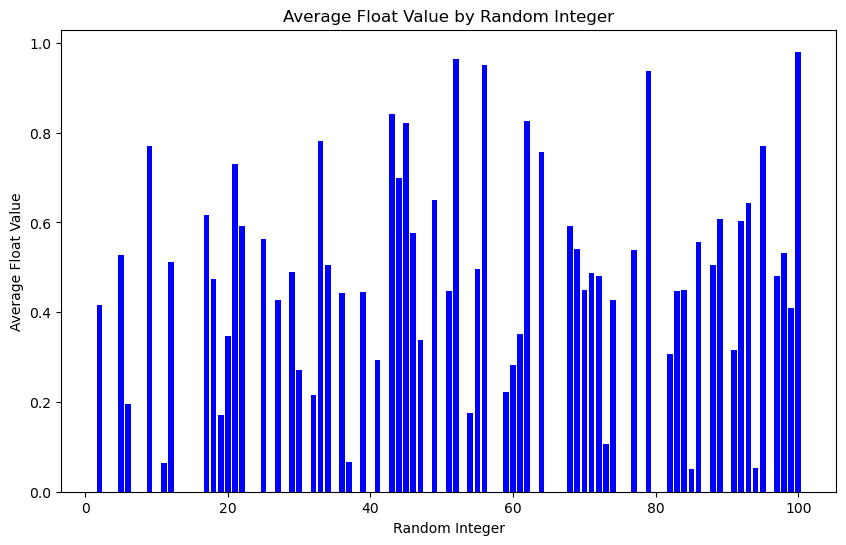

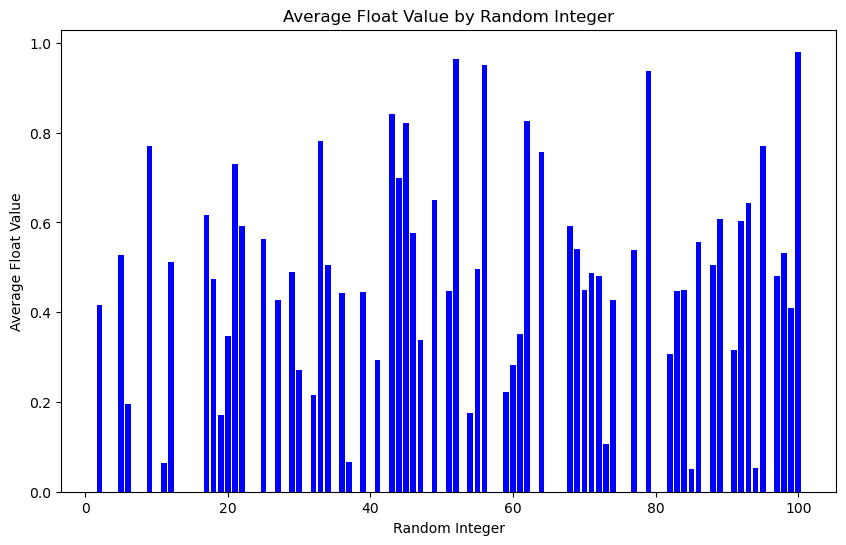

In [19]:
import matplotlib.pyplot as plt
df_pandas = df_grouped.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(df_pandas['random_int'], df_pandas['average_float'], color='blue')
plt.xlabel('Random Integer')
plt.ylabel('Average Float Value')
plt.title('Average Float Value by Random Integer')
plt.show()
import matplotlib.pyplot as plt
df_pandas = df_grouped.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(df_pandas['random_int'], df_pandas['average_float'], color='blue')
plt.xlabel('Random Integer')
plt.ylabel('Average Float Value')
plt.title('Average Float Value by Random Integer')
plt.show()